# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 561


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={unit}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | kerman
Processing Record 5 of Set 1 | colonia
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | carutapera
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | weno
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | lira
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | suva
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | kasongo-lunda
Processing Record 23 o

City not found. Skipping...
Processing Record 40 of Set 4 | hotan
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | guerrero negro
Processing Record 43 of Set 4 | utrik
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | kataragama
City not found. Skipping...
Processing Record 46 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 47 of Set 4 | villagarzon
Processing Record 48 of Set 4 | nouadhibou
Processing Record 49 of Set 4 | saudarkrokur
Processing Record 0 of Set 5 | kavaratti
Processing Record 1 of Set 5 | touros
Processing Record 2 of Set 5 | laayoune
Processing Record 3 of Set 5 | kapa'a
Processing Record 4 of Set 5 | cheremshan
Processing Record 5 of Set 5 | pisco
Processing Record 6 of Set 5 | atar
Processing Record 7 of Set 5 | sakakah
Processing Record 8 of Set 5 | fort st. john
Processing Record 9 of Set 5 | petropavlovsk-kamchatsky
Processing Record 10 of Set 5 | jayapura
Processing Record 11 of Set 5 | haining
Pro

Processing Record 30 of Set 8 | polovinnoye
Processing Record 31 of Set 8 | nishinoomote
Processing Record 32 of Set 8 | kenora
Processing Record 33 of Set 8 | prieska
Processing Record 34 of Set 8 | zhangye
Processing Record 35 of Set 8 | mount isa
Processing Record 36 of Set 8 | baker city
Processing Record 37 of Set 8 | mirny
Processing Record 38 of Set 8 | homer
Processing Record 39 of Set 8 | naharlagun
Processing Record 40 of Set 8 | mermoz boabab
Processing Record 41 of Set 8 | cabo san lucas
Processing Record 42 of Set 8 | kitimat
Processing Record 43 of Set 8 | ishigaki
Processing Record 44 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 45 of Set 8 | amesbury
Processing Record 46 of Set 8 | nizao
Processing Record 47 of Set 8 | manicore
Processing Record 48 of Set 8 | safi
Processing Record 49 of Set 8 | kargasok
Processing Record 0 of Set 9 | anton lizardo
Processing Record 1 of Set 9 | novoul'yanovsk
Processing Record 2 of Set 9 | isoka
Processing Record 

In [99]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [100]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,2.26,98,92,3.28,CL,1701493091
1,ilulissat,69.2167,-51.1000,-8.60,66,26,4.09,GL,1701493092
2,port-aux-francais,-49.3500,70.2167,4.78,90,100,11.67,TF,1701493092
3,kerman,30.2832,57.0788,3.92,45,0,2.06,IR,1701493093
4,colonia,50.9333,6.9500,-0.10,74,100,1.54,DE,1701493094
5,katsuura,35.1333,140.3000,12.74,43,26,3.54,JP,1701493095
6,carutapera,-1.1950,-46.0200,25.23,84,42,2.03,BR,1701493096
7,grytviken,-54.2811,-36.5092,2.78,62,36,4.40,GS,1701493096
8,fortuna,40.5982,-124.1573,10.19,97,0,3.58,US,1701493097
9,ushuaia,-54.8000,-68.3000,2.81,87,0,1.03,AR,1701493098


In [101]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [102]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.26,98,92,3.28,CL,1701493091
1,ilulissat,69.2167,-51.1000,-8.60,66,26,4.09,GL,1701493092
2,port-aux-francais,-49.3500,70.2167,4.78,90,100,11.67,TF,1701493092
3,kerman,30.2832,57.0788,3.92,45,0,2.06,IR,1701493093
4,colonia,50.9333,6.9500,-0.10,74,100,1.54,DE,1701493094


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

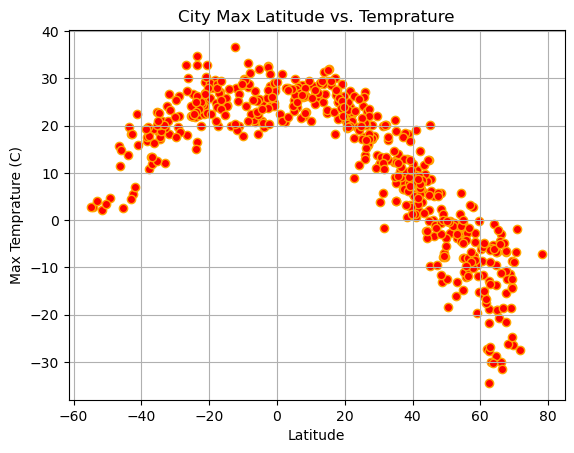

In [103]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = 'red', edgecolor = 'orange')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (C)")
plt.title("City Max Latitude vs. Temprature")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

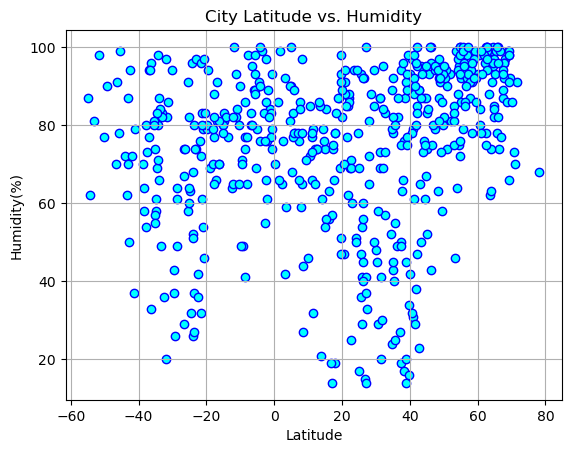

In [104]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = 'cyan', edgecolor = 'blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

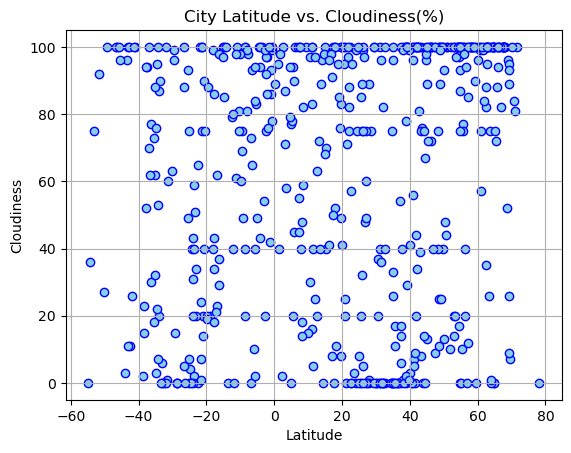

In [105]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = 'skyblue', edgecolor = 'blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness(%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

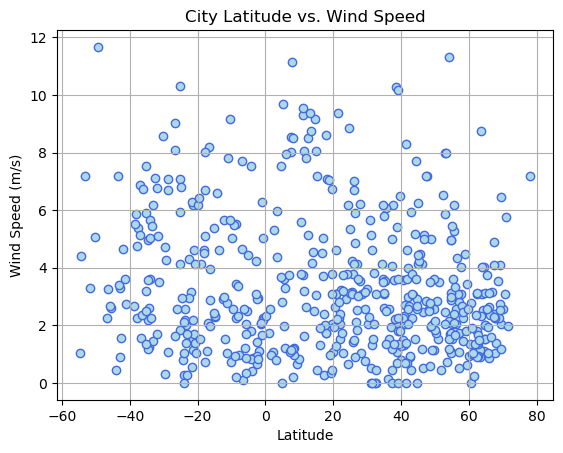

In [106]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = 'lightblue', edgecolor = 'royalblue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [107]:
# Define a function to create Linear Regression plots
feature_latVsTemp = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
feature_latVsHum = linregress(city_data_df["Lat"], city_data_df["Humidity"])
feature_latVsCloud = linregress(city_data_df["Lat"], city_data_df["Cloudiness"])
feature_latVsWind = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])

In [108]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,-8.60,66,26,4.09,GL,1701493092
3,kerman,30.2832,57.0788,3.92,45,0,2.06,IR,1701493093
4,colonia,50.9333,6.9500,-0.10,74,100,1.54,DE,1701493094
5,katsuura,35.1333,140.3000,12.74,43,26,3.54,JP,1701493095
8,fortuna,40.5982,-124.1573,10.19,97,0,3.58,US,1701493097


In [109]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.26,98,92,3.28,CL,1701493091
2,port-aux-francais,-49.3500,70.2167,4.78,90,100,11.67,TF,1701493092
6,carutapera,-1.1950,-46.0200,25.23,84,42,2.03,BR,1701493096
7,grytviken,-54.2811,-36.5092,2.78,62,36,4.40,GS,1701493096
9,ushuaia,-54.8000,-68.3000,2.81,87,0,1.03,AR,1701493098


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.9136495342316835


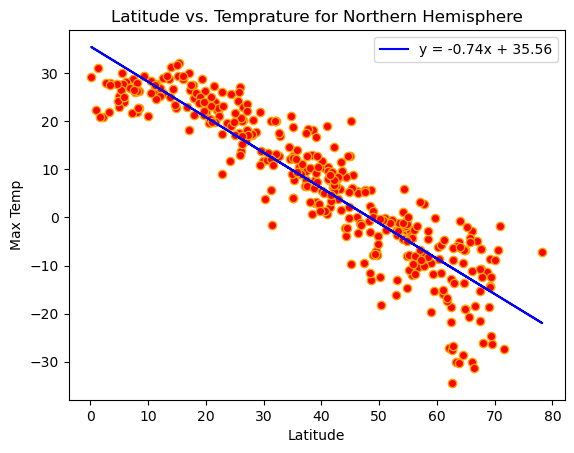

In [124]:
# Linear regression on Northern Hemisphere
feature_latVsTemp_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

slope = feature_latVsTemp_north[0]
intercept = feature_latVsTemp_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], facecolor = 'red', edgecolor = 'orange')
plt.plot(northern_hemi_df["Lat"], y, color = 'blue', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temprature for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsTemp_north[2]}")
plt.show()

The r-value is 0.690730489959591


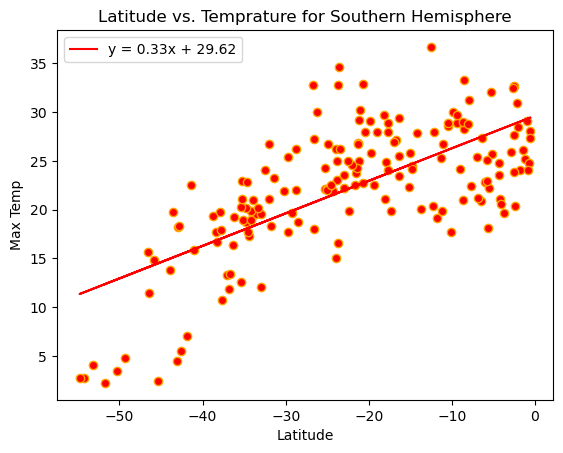

In [123]:
# Linear regression on Southern Hemisphere
feature_latVsTemp_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

slope = feature_latVsTemp_south[0]
intercept = feature_latVsTemp_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], facecolor = 'red', edgecolor = 'orange')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temprature for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsTemp_south[2]}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3683276532858518


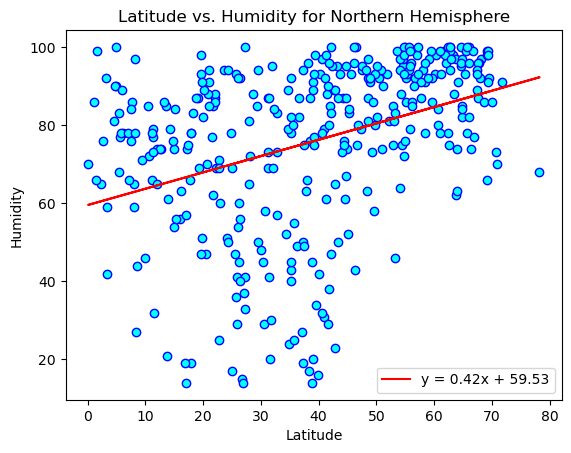

In [122]:
# Northern Hemisphere
feature_latVsHum_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

slope = feature_latVsHum_north[0]
intercept = feature_latVsHum_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], facecolor = 'cyan', edgecolor = 'blue')
plt.plot(northern_hemi_df["Lat"], y, color = 'red', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsHum_north[2]}")
plt.show()

The r-value is 0.16035915525886388


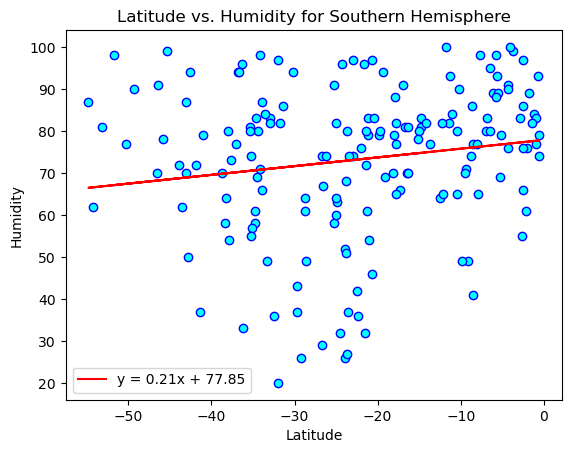

In [125]:
# Southern Hemisphere
feature_latVsHum_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

slope = feature_latVsHum_south[0]
intercept = feature_latVsHum_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], facecolor = 'cyan', edgecolor = 'blue')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsHum_south[2]}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.17764612797891205


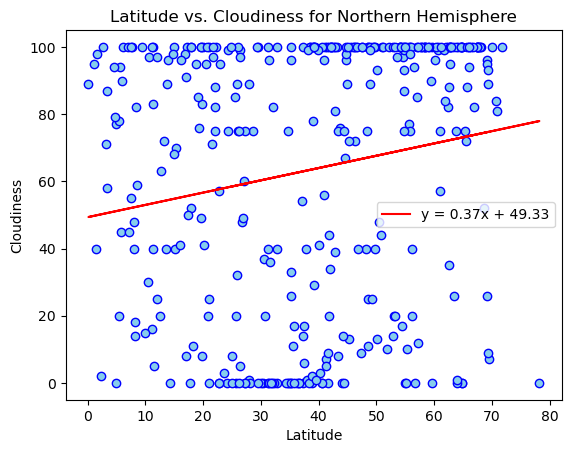

In [127]:
# Northern Hemisphere
feature_latVsCloud_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

slope = feature_latVsCloud_north[0]
intercept = feature_latVsCloud_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], facecolor = 'skyblue', edgecolor = 'blue')
plt.plot(northern_hemi_df["Lat"], y, color = 'red', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsCloud_north[2]}")
plt.show()

The r-value is 0.17955029069079584


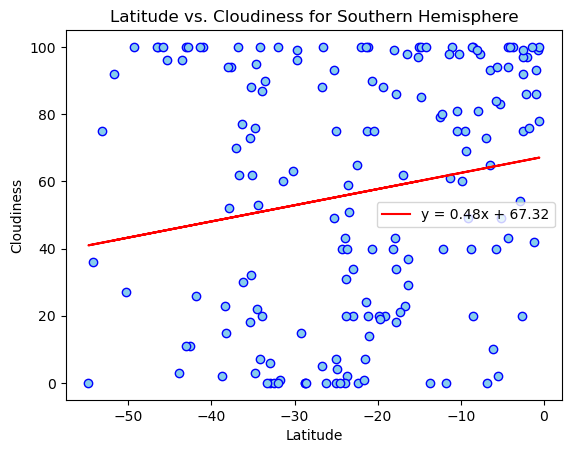

In [128]:
# Southern Hemisphere
feature_latVsCloud_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

slope = feature_latVsCloud_south[0]
intercept = feature_latVsCloud_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], facecolor = 'skyblue', edgecolor = 'blue')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsCloud_south[2]}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.19563621523770636


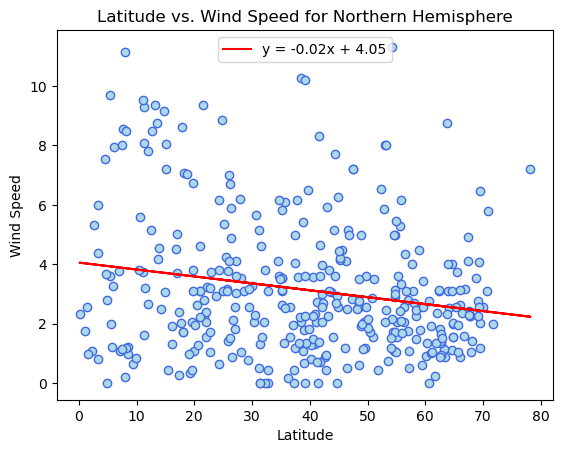

In [129]:
# Northern Hemisphere
feature_latVsWind_north = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

slope = feature_latVsWind_north[0]
intercept = feature_latVsWind_north[1]
y = (slope * northern_hemi_df["Lat"]) + intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], facecolor = 'lightblue', edgecolor = 'royalblue')
plt.plot(northern_hemi_df["Lat"], y, color = 'red', label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed for Northern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsWind_north[2]}")
plt.show()

The r-value is -0.19705497701808575


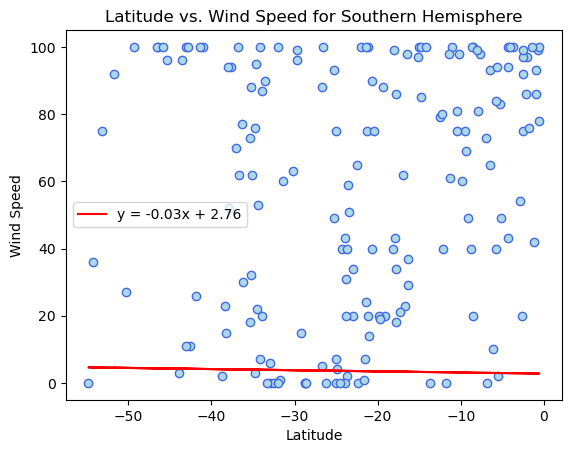

In [130]:
# Southern Hemisphere
feature_latVsWind_south = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

slope = feature_latVsWind_south[0]
intercept = feature_latVsWind_south[1]
y = (slope * southern_hemi_df["Lat"]) + intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], facecolor = 'lightblue', edgecolor = 'royalblue')
plt.plot(southern_hemi_df["Lat"], y, color = 'red',  label = f'y = {slope:.2f}x + {intercept:.2f}')
# Incorporate the other graph properties
plt.legend(loc= "best")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed for Southern Hemisphere")

# Show plot
print(f"The r-value is {feature_latVsWind_south[2]}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE